<a href="https://colab.research.google.com/github/AshbeeKim/Kaggle_task/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/data/kaggle"   
from google.colab import drive  
drive.mount('/content/drive')  
!cd /content/drive/MyDrive/data/kaggle  
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip train.zip
!unzip test.zip
!unzip sample_submission.zip
!ls  

Mounted at /content/drive
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.2MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 28.4MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 62.0MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.2MB/s]
unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.
unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.
unzip:  cannot find or open sample_submission.zip, sample_submission.zip.zip or sample_submission.zip.ZIP.
data_description.txt  sample_data	     test.csv
drive		      sample_submission.csv  train.csv


## File descriptions
*  train.csv - the training set
*  test.csv - the test set
*  data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
*  sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
# import mglearn
import graphviz
import warnings
warnings.filterwarnings('ignore')
# import statsmodels.api as sm

# 최대 줄 수 설정
pd.set_option('display.max_rows', 1500)
# 최대 열 수 설정
pd.set_option('display.max_columns', 1500)
# 표시할 가로의 길이
pd.set_option('display.width', 1500)

In [ ]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
samplesubmisssion = pd.read_csv('./sample_submission.csv')

data = train.copy()

In [ ]:
print(data.shape)
print(test.shape)
print(samplesubmisssion.shape)
print('='*150)
print(data.info())
print(test.info())
print(samplesubmisssion.info())

(1460, 81)
(1459, 80)
(1459, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

=> submission이 id별 SalesPrice맞추는 것

=> test에는 SalesPrice만 없음(test에는 항상 정답은 없어야 함)

=> id가 맞지 않음(train은 1부터 1460, test,subsmission는 1461부터 2919까지)

In [ ]:
print('='*150)
print(data.describe().round(3))
print('-'*150)
print(test.describe().round(3))
print('-'*150)
print(samplesubmisssion.describe().round(3))
#Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
#Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
#Id,SalesPrice

            Id  MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MiscVal    MoSold    YrSold   SalePrice
count  1460.00    1460.000     1201.000    1460.000     1460.000     1460.000   1460.000      1460.000    1452.000    1460.000    1460.000   1460.000     1460.000  1460.000  1460.000      1460.000   1460.000      1460.000      1460.000  1460.000  1460.000      1460.000      1460.000      1460.000    1460.000     1379.000    1460.000    1460.000    1460.000     1460.000       1460.000   1460.000     1460.000  1460.000   1460.000  1460.000  1460.000    1460.000
mean    730.50      56.897       70.050   10516.828        6.099        

In [ ]:
print(data.columns) #'dropoff_datetime', 'trip_duration'는 test에 없고 train에만 있는 데이터, samplesubmission에는 'id'와 'trip_duration'만 있음
print('-'*250)
print(test.columns)
print('-'*250)
print(samplesubmisssion.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'P

In [ ]:
print(data.head())
print(data.tail())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside   

In [ ]:
print(test.head())
print(test.tail())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
0  1461          20       RH         80.0    11622   Pave   NaN      Reg         Lvl    AllPub    Inside       Gt

In [ ]:
print(samplesubmisssion.head())
print(samplesubmisssion.tail())

     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977
        Id      SalePrice
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657


## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other * categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [ ]:
print(len(data[categorical].columns))

43


In [ ]:
43//3

14

AttributeError: ignored

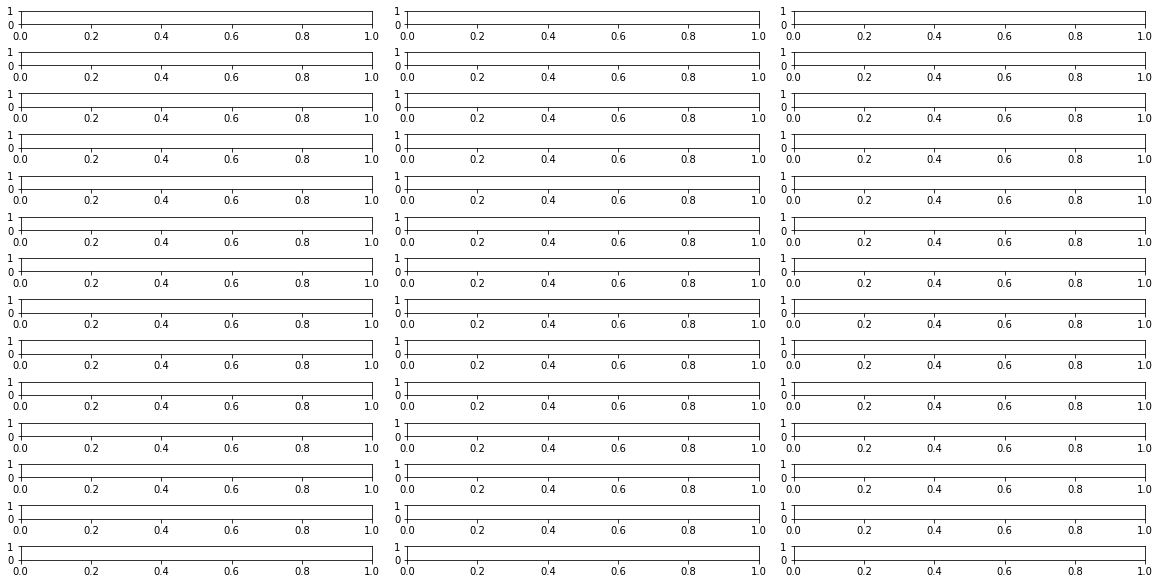

In [ ]:
n = len(data[categorical].columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(n//3,n//12,figsize=(16,8),constrained_layout=True)

for i, col in enumerate(data[categorical].columns):
  data[col].histplot(kind='hist',ax=ax[i//3,i%3],title=col)
plt.show()  

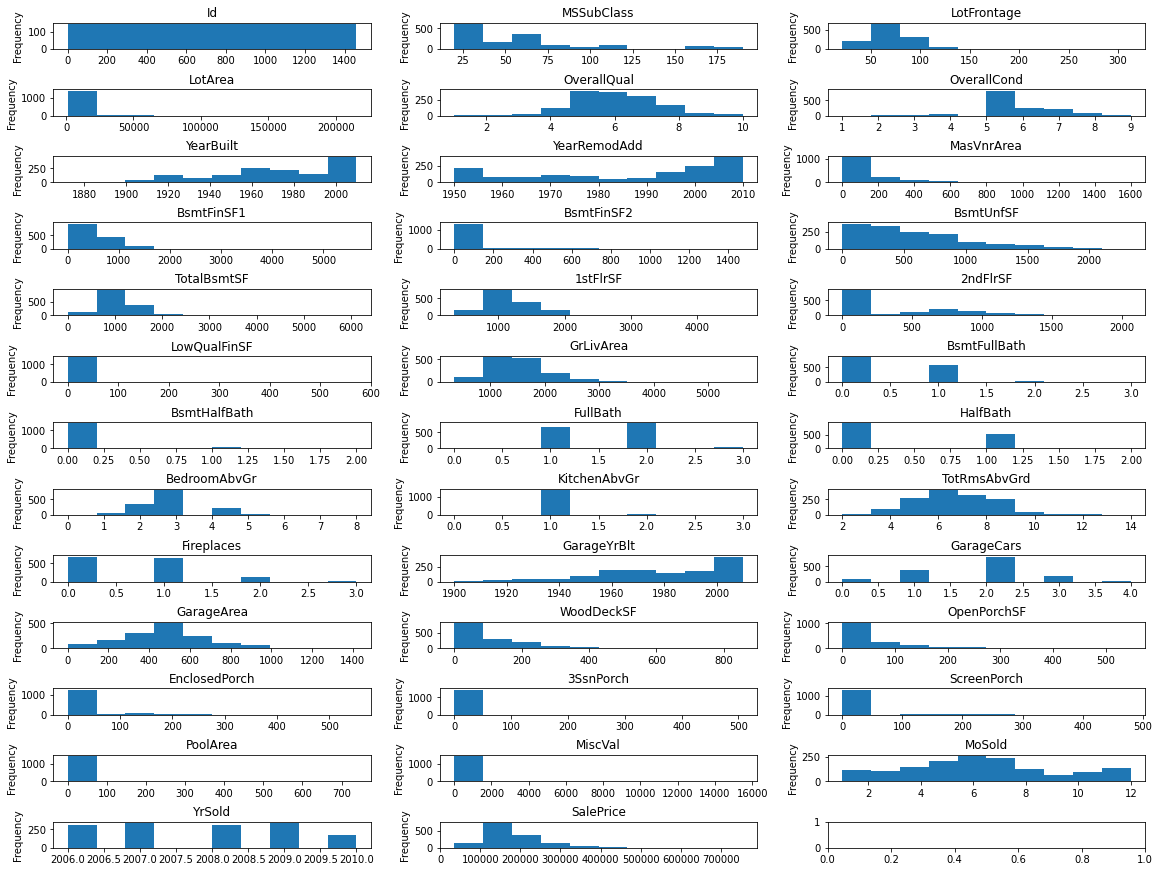

In [ ]:
n = len(data[non_categorical].columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(13,n//10,figsize=(16,12),constrained_layout=True)

for i, col in enumerate(data[non_categorical].columns):
  data[col].plot(kind='hist',ax=ax[i//3,i%3],title=col)
plt.show()  

In [ ]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [ ]:
data.loc[:,['Street','Alley','Condition1','Condition2']]

,Street,Alley,Condition1,Condition2
0,Pave,NaN,Norm,Norm
1,Pave,NaN,Feedr,Norm
2,Pave,NaN,Norm,Norm
3,Pave,NaN,Norm,Norm
4,Pave,NaN,Norm,Norm
5,Pave,NaN,Norm,Norm
6,Pave,NaN,Norm,Norm
7,Pave,NaN,PosN,Norm
8,Pave,NaN,Artery,Norm
9,Pave,NaN,Artery,Artery


alley, fence, miscfeature, poolqc, 

In [ ]:
all_columns = data.columns.values

non_categorical = ['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
                   'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                   '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                   'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                   'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                   '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

categorical = [value for value in all_columns if value not in non_categorical]

In [ ]:
print(data[non_categorical].head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0   1          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0          0            0         0        0       2    2008     208500
1   2          20         80.0     9600            6            8       1976          1976         0.0        

In [ ]:
print(data[categorical].tail())

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd       None        TA        TA      PConc       Gd       TA           No          Unf          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y    NaN    NaN         NaN       WD        Normal
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl       NWAm

In [ ]:
for value in data[non_categorical].columns:
  print(f'{value} : {data[value].isna().sum()}')

Id : 0
MSSubClass : 0
LotFrontage : 259
LotArea : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
MasVnrArea : 8
BsmtFinSF1 : 0
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
TotRmsAbvGrd : 0
Fireplaces : 0
GarageYrBlt : 81
GarageCars : 0
GarageArea : 0
WoodDeckSF : 0
OpenPorchSF : 0
EnclosedPorch : 0
3SsnPorch : 0
ScreenPorch : 0
PoolArea : 0
MiscVal : 0
MoSold : 0
YrSold : 0
SalePrice : 0


In [ ]:
for value in data[categorical].columns:
  print(f'{value} : {data[value].isna().sum()}')

MSZoning : 0
Street : 0
Alley : 1369
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 8
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
KitchenQual : 0
Functional : 0
FireplaceQu : 690
GarageType : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PavedDrive : 0
PoolQC : 1453
Fence : 1179
MiscFeature : 1406
SaleType : 0
SaleCondition : 0


In [ ]:
for value in data[categorical].columns:
  print(f'{value} : {data[value].unique()}')

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

## isna.sum()__drop or fillna(0)
### non_categorical ~ .isna().sum()
* LotFrontage : 259
* MasVnrArea : 8
* GarageYrBlt : 81

### categorical ~ .isna().sum()
* **Alley : 1369** [nan 'Grvl' 'Pave']
* **MasVnrType : 8** ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
* **BsmtQual : 37** ['Gd' 'TA' 'Ex' nan 'Fa']
* **BsmtCond : 37** ['TA' 'Gd' nan 'Fa' 'Po']
* **BsmtExposure : 38** ['No' 'Gd' 'Mn' 'Av' nan]
* **BsmtFinType1 : 37** ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
* **BsmtFinType2 : 38** ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
* **Electrical : 1** ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
* **FireplaceQu : 690** [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
* **GarageType : 81** ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
* **GarageFinish : 81** ['RFn' 'Unf' 'Fin' nan]
* **GarageQual : 81** ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
* **GarageCond : 81** ['TA' 'Fa' nan 'Gd' 'Po' 'Ex'
* **PoolQC : 1453** [nan 'Ex' 'Fa' 'Gd']
* **Fence : 1179** [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
* **MiscFeature : 1406** [nan 'Shed' 'Gar2' 'Othr' 'TenC']

Alley의 값에 NaN이 있는 것에 반해, Street에는 NaN값이 없으며, 동일한 값으로 구별됨

In [ ]:
data = pd.get_dummies(data)

#missing_value
from sklearn.imputer import Simpleimputer

imp1 = imputer(missing_value=np.nan,strategy = 'most_frequent',axis=0)
imp2 = imputer(missing_value=np.inf,strategy = 'most_frequent',axis=0)
data = imp1.fit_transform(data)
data = imp2.fit_transform(data)

#log transformating
data = np.log(data)
labels = np.log(labels)

#int->0(using log)
data[data==np.inf]=0

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)
#whiten : 들어오는 input의 feature들을 uncorrelattion하게 만들고, 각각의 variation를 1로 만들어주는 작업

pca.fit(data)


In [ ]:
pca = PCA(n_components=36,whiten=True)
pca = pca.fit(data)
trainPCA = pca.transform(data)

In [ ]:
train_data = data[:1460]
test_data = data[1460:]

In [ ]:
#R^2 squared defination
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import LightGBMRegressor
from catboost import CatBoostRegressor

def Squared(train, labels):
  results = {}
  def test_model(clf):
    cv = KFold(n_split=5, shuffle=True, random_stage=42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(clf.train, labels=cv, scoring=12)

    clf = LinearRegresssion()
    result['Linear'] = test_model(clf)

    clf = Ridge()
    result['Ridge'] = test_model(clf)

    clf = BaggingRegresssor()
    result['Bagging'] = test_model(clf)

    clf = RandomForestRegresssor()
    result['RandomForest'] = test_model(clf)

    clf = AdaBoostRegressor()
    result['AdaBoost'] = test_model(clf)

    clf = GradientBoostingRegressor()
    result['GradientBoosting'] = test_model(clf)

    clf = SVR()
    result['SVR'] = test_model(clf)

    clf = XGBRegressor()
    result['XGB'] = test_model(clf)

    clf = LightGBMRegressor()
    result['LightGBM'] = test_model(clf)

    clf = CatBoostRegressor()
    result['CatBoost'] = test_model(clf)

    result = pd.DataFrame.from_dict(result, orient='index')
    result.columns = ['R square Score']
    result = result.sort(columns = ['R square Score'])

classification plots

[link] https://datascienceplus.com/machine-learning-results-one-plot-to-rule-them-all/